<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Soltani

**Student ID**: 400101356





## Importing Libraries

First we import libraries that we need for this assignment.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [72]:
X, Y = None, None

### START CODE HERE ###

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data_logistic.csv')

# Extract the features
X = df[['X1', 'X2', 'X3']].values

# Extract the target variable
Y = df['Y'].values



### END CODE HERE ###




print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:
Normalization is an important step in preprocessing data for machine learning algorithms. Here’s why:

Scale Features: Normalization scales all numeric features to be on the same scale, preventing any single feature from dominating others when training the model. This is especially important for algorithms that use a distance measure, like k-nearest neighbors (KNN), or when the features have different units (e.g., age in years and income in dollars).

Speed Up Training: Normalized data can help the gradient descent algorithm converge more quickly, which speeds up training.

Better Performance: Some algorithms assume that all features are centered around zero and have approximately the same variance. If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset, which is not something we want happening.





In this code, np.mean and np.std are used to calculate the mean and standard deviation of each feature and the target variable. The normalized data is then calculated by subtracting the mean and dividing by the standard deviation. Please note that whether to normalize the target variable or not depends on the specific problem and the model you’re using.

In [73]:
### START CODE HERE ###
# Normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

# Normalize the target variable
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_norm = (Y - Y_mean) / Y_std

### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [74]:
### START CODE HERE ###
import numpy as np

# Add a column of ones at the beginning of X

X = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))

### END CODE HERE ###

print(X.shape)
X

(10000, 4)


array([[ 1.        , -1.00066149, -0.60536985, -0.85021999],
       [ 1.        , -1.45366949,  1.73051062, -0.20238503],
       [ 1.        ,  0.26239007,  1.69140966,  0.64234794],
       ...,
       [ 1.        ,  1.35418019, -0.1188587 ,  1.41249602],
       [ 1.        ,  1.41727838,  0.76498604,  0.94404812],
       [ 1.        ,  0.79312016,  1.49592029,  0.85670437]])

## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [42]:
def sigmoid(Z ):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    s = 1 / (1 + np.exp(-Z))
    return s
    ### END CODE HERE ###

In [14]:
print(sigmoid(0))  # Should print 0.5
print(sigmoid(np.array([1, 2, 3])))  # Should print array([0.73105858, 0.88079708, 0.95257413])

0.5
[0.73105858 0.88079708 0.95257413]


### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [75]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''

    m, n = X.shape
    loss = None
    ### START CODE HERE ###

    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))

    # Compute the cost
    loss = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + (regLambda/(2*m)) * np.sum(np.square(theta))

    ### END CODE HERE ###
    return loss


### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

The gradient of the cost function for the jth element (for j=1...d) is given by:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} + \lambda \theta_j$$

This formula is similar to the one for the 0th element, but with an additional regularization term $$\lambda \theta_j$$. This term helps to prevent overfitting by penalizing large values of the parameters $$\theta_j$$. Note that we do not include this term for j=0 because we do not want to penalize the bias term $$\theta_0$$.

In [76]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    grad = None
    ### START CODE HERE ###

    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))

    # Compute the gradient
    grad = (1/m) * np.dot(X.T, (h - y)) + (regLambda/m) * theta

    # Do not regularize the bias term
    grad[0] -= (regLambda/m) * theta[0]

    ### END CODE HERE ###
    return grad





### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [77]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    m, n = X.shape
    theta, loss_history = None, None
    ### START CODE HERE ###

    theta = np.zeros(n)
    loss_history = []

    for i in range(maxNumIters):
        # Compute the cost and gradient
        loss = computeCost(theta, X, y, regLambda)
        grad = computeGradient(theta, X, y, regLambda)

        # Update theta
        theta_new = theta - alpha * grad

        # Check for convergence
        if hasConverged(theta, theta_new, epsilon):
            break

        # Update theta and record the loss
        theta = theta_new
        loss_history.append(loss)

    # loss_history = np.array(loss_history)


    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''

    ### START CODE HERE ###
    ans = np.sqrt(np.sum((theta_new - theta_old)**2)) <= epsilon
    ### END CODE HERE ###
    return ans




Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [78]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###


# Print the final theta
print("Final theta:", theta)

# Print the loss of each iteration
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: Loss = {loss}")


# # Print the final model parameters
# print("Final model parameters (theta):")
# print(theta)

# # Print the loss at each iteration
# print("\nLoss at each iteration:")
# for i, loss in enumerate(loss_history):
#     print(f"Iteration {i}: {loss}")


### END CODE HERE ###

Final theta: [ 0.14721272 -0.21750811  0.23679233  0.07455652]
Iteration 1: Loss = 0.6931471805599466
Iteration 2: Loss = 0.6914869052302786
Iteration 3: Loss = 0.6898349934871241
Iteration 4: Loss = 0.6881914029705568
Iteration 5: Loss = 0.6865560913591333
Iteration 6: Loss = 0.684929016373746
Iteration 7: Loss = 0.683310135781413
Iteration 8: Loss = 0.6816994073990053
Iteration 9: Loss = 0.6800967890969132
Iteration 10: Loss = 0.6785022388026495
Iteration 11: Loss = 0.6769157145043903
Iteration 12: Loss = 0.6753371742544529
Iteration 13: Loss = 0.6737665761727134
Iteration 14: Loss = 0.6722038784499583
Iteration 15: Loss = 0.6706490393511765
Iteration 16: Loss = 0.6691020172187893
Iteration 17: Loss = 0.6675627704758154
Iteration 18: Loss = 0.6660312576289769
Iteration 19: Loss = 0.6645074372717414
Iteration 20: Loss = 0.6629912680873054
Iteration 21: Loss = 0.6614827088515111
Iteration 22: Loss = 0.659981718435707
Iteration 23: Loss = 0.6584882558095457
Iteration 24: Loss = 0.657002

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [94]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

from sklearn.model_selection import train_test_split
data = X
label = Y


# First split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X, Y, train_size=0.7, random_state=42)

# Second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.33, random_state=42)


print("Training set size is ", X_train.shape[0])
print("Validation set size is", X_val.shape[0])
print("Test set size is", X_test.shape[0])

### END CODE HERE ###

Training set size is  7000
Validation set size is 2010
Test set size is 990


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [92]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    Y = None
    ### START CODE HERE ###

    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))

    # Convert probabilities into binary predictions
    Y = (h > 0.5).astype(int)

    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

The learning rate and regularization constant are hyperparameters that control the behavior of the gradient descent algorithm and the complexity of the model, respectively.

Learning Rate (alpha): The learning rate determines the step size at each iteration while moving toward a minimum of a loss function.

If the learning rate is too small, the model will require many updates before reaching the minimum. The model may also get stuck in a local minimum and not reach the global minimum.
If the learning rate is too large, the model may overshoot the minimum and the algorithm may diverge, resulting in an unstable training process.
Regularization Constant (lambda): The regularization constant determines the amount of regularization in the model. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function.

If the regularization constant is too small, the model may overfit the training data, leading to poor performance on unseen data.
If the regularization constant is too large, the model may underfit the data, also leading to poor performance due to high bias.
To find the best values for these parameters, you can use techniques like grid search or random search, where you try different combinations of hyperparameters and choose the combination that gives the best performance on a validation set. You can also use more sophisticated methods like Bayesian optimization.

It’s important to note that the best values for these parameters can vary depending on the specific dataset and problem you’re working with. Therefore, it’s always a good idea to experiment with different values to see what works best for your specific use case.

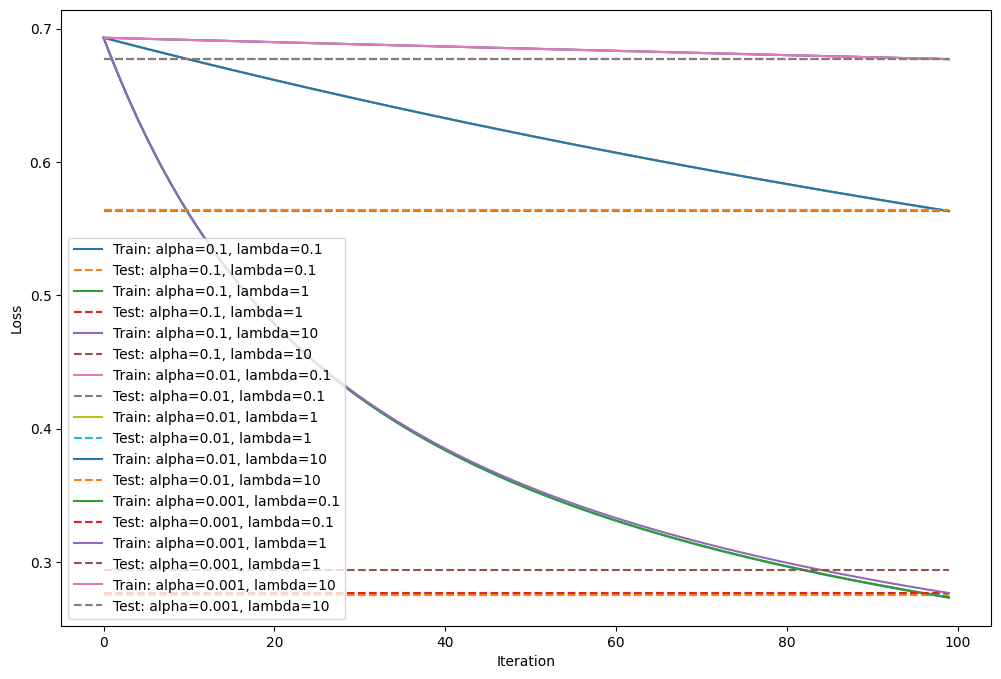

In [93]:
### START CODE HERE ###
import matplotlib.pyplot as plt

# Define some possible values for the learning rate and regularization constant
learning_rates = [0.1, 0.01, 0.001]
reg_constants = [0.1, 1, 10]

# Initialize a figure for the plots
plt.figure(figsize=(12, 8))

# Loop over the learning rates and regularization constants
for alpha in learning_rates:
    for regLambda in reg_constants:
        # Train the model and get the loss history
        theta, loss_history_train = fit(X_train, y_train, regLambda=regLambda, alpha=alpha)

        # Predict the test data and calculate the loss
        y_pred_test = predict(X_test, theta)
        loss_test = computeCost(theta, X_test, y_test, regLambda)

        # Create a numpy array filled with the test loss
        loss_history_test = np.full_like(loss_history_train, fill_value=loss_test)

        # Plot the loss history for the training and test data
        plt.plot(loss_history_train, label=f'Train: alpha={alpha}, lambda={regLambda}')
        plt.plot(loss_history_test, label=f'Test: alpha={alpha}, lambda={regLambda}', linestyle='--')

# Add labels and a legend to the plot
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

The accuracy of the Gaussian Naive Bayes classifier on the test set can be obtained by running the code snippet provided in the next step. The accuracy_score(y_test, y_pred) line in the code calculates the accuracy of the classifier on the test set.


In [89]:
### START CODE HERE ###
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a GaussianNB classifier
clf = GaussianNB()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of GaussianNB classifier on test set: ", accuracy)

### END CODE HERE ###

Accuracy of GaussianNB classifier on test set:  0.9282828282828283


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

The accuracy of the Linear Discriminant Analysis (LDA) classifier on the test set can be obtained by running the appropriate code in your Python environment.

In [90]:
### START CODE HERE ###
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Create an LDA classifier
clf = LinearDiscriminantAnalysis()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of LDA classifier on test set: ", accuracy)

### END CODE HERE ###

Accuracy of LDA classifier on test set:  0.9848484848484849


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:

The best method is LDA, with accuracy = 0.9848